### Project Overview 
- For this project compare the Volatility Market and the 10 Year Trearury. Since both markets are inversely coorelated to the Capital Market what indicators can you use to predict or forecast the 10 year Treasury.

In [246]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [247]:
tickers = ["^VIX", "UVXY"]

In [248]:
vol_data = pd.DataFrame()

In [249]:
for t in tickers:
    vol_data[t] = web.DataReader(t, data_source="yahoo", start = "2012-1-1")["Open"]

In [250]:
vol_data

,^VIX,UVXY
Date,,
2012-01-03,22.950001,6.624000e+07
2012-01-04,23.440001,6.714000e+07
2012-01-05,22.750000,6.444000e+07
2012-01-06,21.240000,5.886000e+07
2012-01-09,21.670000,5.688000e+07
...,...,...
2020-07-29,25.160000,2.524000e+01
2020-07-30,25.040001,2.671000e+01
2020-07-31,24.790001,2.488000e+01


### Lets get 10year treasury rate 

In [251]:
ten_year = pd.read_csv("resources/10year_treasury.csv", parse_dates=True, index_col="DATE")

In [252]:
ten_year.replace(["."], np.nan, inplace=True)

In [253]:
ten_year["DGS10"] = pd.to_numeric(ten_year['DGS10'])

In [254]:
ten_year.isnull().sum()

DGS10    220
dtype: int64

####  Dropping Nulls

In [255]:
working_data_tenyear = ten_year.loc["2012-01-03":]

In [256]:
working_data_vol = vol_data.loc["2012-1-3":"2020-06-11"]

In [257]:
working_data_vol

,^VIX,UVXY
Date,,
2012-01-03,22.950001,6.624000e+07
2012-01-04,23.440001,6.714000e+07
2012-01-05,22.750000,6.444000e+07
2012-01-06,21.240000,5.886000e+07
2012-01-09,21.670000,5.688000e+07
...,...,...
2020-06-05,24.790001,2.724000e+01
2020-06-08,25.559999,2.743000e+01
2020-06-09,25.930000,2.968000e+01


In [258]:
working_data_tenyear

,DGS10
DATE,
2012-01-03,1.97
2012-01-04,2.00
2012-01-05,2.02
2012-01-06,1.98
2012-01-09,1.98
...,...
2020-06-05,0.91
2020-06-08,0.88
2020-06-09,0.84


In [259]:
final_data = pd.concat([working_data_tenyear, working_data_vol], axis=1)

In [260]:
final_data.corr()

,DGS10,^VIX,UVXY
DGS10,1.000000,-0.443367,-0.141378
^VIX,-0.443367,1.000000,0.111111
UVXY,-0.141378,0.111111,1.000000


In [261]:
final_data

,DGS10,^VIX,UVXY
2012-01-03,1.97,22.950001,6.624000e+07
2012-01-04,2.00,23.440001,6.714000e+07
2012-01-05,2.02,22.750000,6.444000e+07
2012-01-06,1.98,21.240000,5.886000e+07
2012-01-09,1.98,21.670000,5.688000e+07
...,...,...,...
2020-06-05,0.91,24.790001,2.724000e+01
2020-06-08,0.88,25.559999,2.743000e+01
2020-06-09,0.84,25.930000,2.968000e+01
2020-06-10,0.75,26.730000,3.088000e+01


In [262]:
final_data.columns = ["10 year", "VIX", "UVXY"]

In [263]:
final_data

,10 year,VIX,UVXY
2012-01-03,1.97,22.950001,6.624000e+07
2012-01-04,2.00,23.440001,6.714000e+07
2012-01-05,2.02,22.750000,6.444000e+07
2012-01-06,1.98,21.240000,5.886000e+07
2012-01-09,1.98,21.670000,5.688000e+07
...,...,...,...
2020-06-05,0.91,24.790001,2.724000e+01
2020-06-08,0.88,25.559999,2.743000e+01
2020-06-09,0.84,25.930000,2.968000e+01
2020-06-10,0.75,26.730000,3.088000e+01


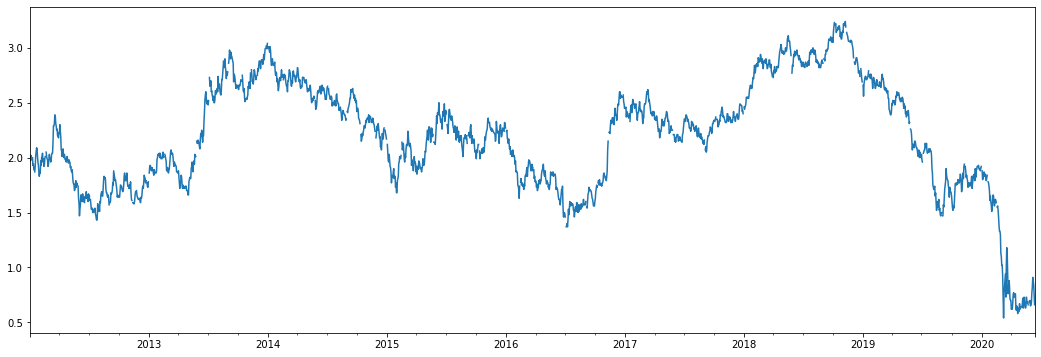

In [264]:
final_data['10 year'].plot(figsize = (18,6))

### lets prep out data for training

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
import seaborn as sns

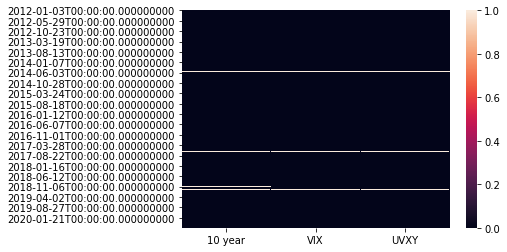

In [267]:
sns.heatmap(final_data.isnull())

In [268]:
final_data.dropna(inplace=True)

In [269]:
X = final_data.drop("10 year", axis=1).values
y = final_data["10 year"].values

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Scaling the data

In [271]:
from sklearn.preprocessing import MinMaxScaler

In [272]:
scalar = MinMaxScaler()

In [273]:
X_train = scalar.fit_transform(X_train)

In [274]:
X_test= scalar.transform(X_test)

### Early Stopping

In [275]:
from tensorflow.keras.callbacks import EarlyStopping

In [276]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=50)

### Setting up model

In [277]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [278]:
model = Sequential()
model.add(Dense(units =200, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units =180, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units =150, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units =100, activation = "relu"))
model.add(Dense(units = 1))
model.compile(optimizer = "adam", loss = "mse")

## fitting model

In [279]:
model.fit(X_train, y_train,validation_data=(X_test,y_test), callbacks=[stop], epochs=600)

Train on 1476 samples, validate on 633 samples
Epoch 1/600
1476/1476 [==============================] - 3s 2ms/sample - loss: 1.9481 - val_loss: 0.3501
Epoch 2/600
1476/1476 [==============================] - 1s 418us/sample - loss: 0.4231 - val_loss: 0.2366
Epoch 3/600
1476/1476 [==============================] - 1s 418us/sample - loss: 0.3307 - val_loss: 0.2092
Epoch 4/600
1476/1476 [==============================] - 1s 415us/sample - loss: 0.2928 - val_loss: 0.2379
Epoch 5/600
1476/1476 [==============================] - 1s 435us/sample - loss: 0.2864 - val_loss: 0.2070
Epoch 6/600
1476/1476 [==============================] - 1s 449us/sample - loss: 0.2546 - val_loss: 0.1968
Epoch 7/600
1476/1476 [==============================] - 1s 498us/sample - loss: 0.2614 - val_loss: 0.2213
Epoch 8/600
1476/1476 [==============================] - 1s 488us/sample - loss: 0.2396 - val_loss: 0.2120
Epoch 9/600
1476/1476 [==============================] - 1s 482us/sample - loss: 0.2392 - val_loss:

1476/1476 [==============================] - 1s 464us/sample - loss: 0.1814 - val_loss: 0.1811
Epoch 77/600
1476/1476 [==============================] - 1s 475us/sample - loss: 0.1788 - val_loss: 0.1845
Epoch 78/600
1476/1476 [==============================] - 1s 475us/sample - loss: 0.1782 - val_loss: 0.1834
Epoch 79/600
1476/1476 [==============================] - 1s 462us/sample - loss: 0.1736 - val_loss: 0.1740
Epoch 80/600
1476/1476 [==============================] - 1s 463us/sample - loss: 0.1773 - val_loss: 0.1780
Epoch 81/600
1476/1476 [==============================] - 1s 461us/sample - loss: 0.1794 - val_loss: 0.1874
Epoch 82/600
1476/1476 [==============================] - 1s 470us/sample - loss: 0.1781 - val_loss: 0.1821
Epoch 83/600
1476/1476 [==============================] - 1s 470us/sample - loss: 0.1751 - val_loss: 0.1780
Epoch 84/600
1476/1476 [==============================] - 1s 472us/sample - loss: 0.1790 - val_loss: 0.1769
Epoch 85/600
1476/1476 [=================

1476/1476 [==============================] - 1s 459us/sample - loss: 0.1736 - val_loss: 0.1744
Epoch 152/600
1476/1476 [==============================] - 1s 469us/sample - loss: 0.1740 - val_loss: 0.1722
Epoch 153/600
1476/1476 [==============================] - 1s 481us/sample - loss: 0.1742 - val_loss: 0.1736
Epoch 154/600
1476/1476 [==============================] - 1s 470us/sample - loss: 0.1747 - val_loss: 0.1764
Epoch 155/600
1476/1476 [==============================] - 1s 492us/sample - loss: 0.1737 - val_loss: 0.1751
Epoch 156/600
1476/1476 [==============================] - 1s 469us/sample - loss: 0.1757 - val_loss: 0.1788
Epoch 157/600
1476/1476 [==============================] - 1s 474us/sample - loss: 0.1765 - val_loss: 0.1762
Epoch 158/600
1476/1476 [==============================] - 1s 463us/sample - loss: 0.1697 - val_loss: 0.1786
Epoch 159/600
1476/1476 [==============================] - 1s 456us/sample - loss: 0.1775 - val_loss: 0.1757
Epoch 160/600
1476/1476 [========

1476/1476 [==============================] - 1s 468us/sample - loss: 0.1710 - val_loss: 0.1773
Epoch 227/600
1476/1476 [==============================] - 1s 480us/sample - loss: 0.1724 - val_loss: 0.1747
Epoch 228/600
1476/1476 [==============================] - 1s 467us/sample - loss: 0.1719 - val_loss: 0.1737
Epoch 229/600
1476/1476 [==============================] - 1s 469us/sample - loss: 0.1734 - val_loss: 0.1721
Epoch 230/600
1476/1476 [==============================] - 1s 467us/sample - loss: 0.1709 - val_loss: 0.1731
Epoch 231/600
1476/1476 [==============================] - 1s 471us/sample - loss: 0.1731 - val_loss: 0.1730
Epoch 232/600
1476/1476 [==============================] - 1s 465us/sample - loss: 0.1733 - val_loss: 0.1744
Epoch 233/600
1476/1476 [==============================] - 1s 491us/sample - loss: 0.1742 - val_loss: 0.1730
Epoch 234/600
1476/1476 [==============================] - 1s 502us/sample - loss: 0.1703 - val_loss: 0.1734
Epoch 235/600
1476/1476 [========

### Evauating the model

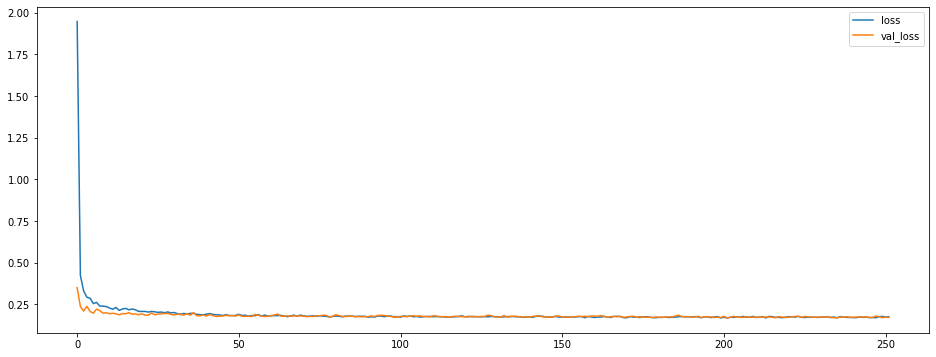

In [280]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

### Predicitons

In [281]:
predictions = model.predict(X_test)

### Metrics 

In [282]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error

In [283]:
explained_variance_score(y_test, predictions)

0.3394660787476599

In [284]:
mean_absolute_error(y_test, predictions)

0.3227381980400326

In [285]:
mean_squared_error(y_test, predictions)

0.1712425403211613

### Random Predictions

In [286]:
from random import randint
random_index = randint(1, len(final_data))
random_day = final_data.drop("10 year", axis=1).iloc[random_index]

In [287]:
random_day

VIX         14.56
UVXY    379500.00
Name: 2013-08-16 00:00:00, dtype: float64

### We willl need to scale reshape and get the values of the random day. Since out model was trained as such

In [288]:
X_train.shape

(1476, 2)

In [289]:
new_day = scalar.transform(random_day.values.reshape(1,2))

In [290]:
model.predict(new_day)

array([[2.3703775]], dtype=float32)